# EDA GOOGLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets Metadatos

Leemos el dataset metadata el cual venia varios json que los unimos y borramos las columnas 'description' y 'price' por tener muchos valores faltos y ser inecesarios:

In [4]:
metadatos_sitio = pd.read_parquet('../Dataset Final Google/Metadata Sitios/metadata_sitios.parquet')

Hacemos un primer vistazo general de las filas y columnas que tienen los datasets final.

In [5]:
metadatos_sitio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   latitude          float64
 4   longitude         float64
 5   category          object 
 6   avg_rating        float64
 7   num_of_reviews    int64  
 8   hours             object 
 9   MISC              object 
 10  state             object 
 11  relative_results  object 
 12  url               object 
dtypes: float64(3), int64(1), object(9)
memory usage: 300.0+ MB


Notamos un total de 3025011 filas y 15 columnas. Vemos mas de cerca las primeras filas:

In [6]:
metadatos_sitio.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,[Korean restaurant],4.4,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,[Fabric store],3.3,6,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,[Fabric store],4.3,7,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Notamos varias columnas anidadas como 'category','hours' y 'MISC'. Ahora vemos el tipo de dato de las columnas:

In [7]:
columnas_metadata = metadatos_sitio.columns.tolist()
for columna in columnas_metadata:
    print(f"La columna '{columna}' es de tipo: {metadatos_sitio[columna].dtype}")

La columna 'name' es de tipo: object
La columna 'address' es de tipo: object
La columna 'gmap_id' es de tipo: object
La columna 'latitude' es de tipo: float64
La columna 'longitude' es de tipo: float64
La columna 'category' es de tipo: object
La columna 'avg_rating' es de tipo: float64
La columna 'num_of_reviews' es de tipo: int64
La columna 'hours' es de tipo: object
La columna 'MISC' es de tipo: object
La columna 'state' es de tipo: object
La columna 'relative_results' es de tipo: object
La columna 'url' es de tipo: object


 Ahora observamos la cantidad de nulos por Columna:

In [8]:
metadatos_sitio.isna().sum()

name                    37
address              80511
gmap_id                  0
latitude                 0
longitude                0
category             17419
avg_rating               0
num_of_reviews           0
hours               787405
MISC                690834
state               746455
relative_results    295058
url                      0
dtype: int64

Lo vemos con un grafico de barras apiladas el total de nulos por columna:

In [9]:
nombres = metadatos_sitio.columns.tolist()

In [10]:
nulos = metadatos_sitio.isna().sum()
nulos = nulos.iloc[:].tolist()

In [11]:
total_filas = 3025011 

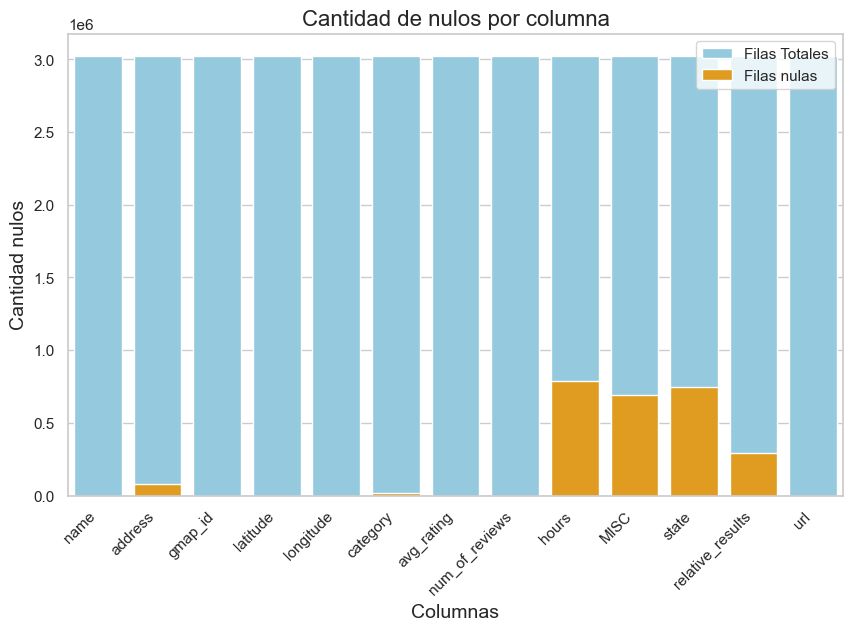

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.barplot(x= nombres, y= total_filas, color='skyblue', label='Filas Totales')
sns.barplot(x= nombres, y= nulos, color='orange', label='Filas nulas')
plt.xlabel('Columnas', fontsize=14)
plt.ylabel('Cantidad nulos', fontsize=14)
plt.title('Cantidad de nulos por columna', fontsize=16)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

Ahora verificamos duplicados con las columnas no anidadas:

In [13]:
# Establecemos las columnas no anidadas
columnas_a_verificar = ['name', 'address', 'gmap_id', 'latitude', 'longitude', 'avg_rating', 'num_of_reviews','state','url']

In [14]:
print(f'La cantidad de duplicados: {metadatos_sitio[columnas_a_verificar].duplicated().sum()}')

La cantidad de duplicados: 26583


Ahora vemos algunas apreciaciones como la cantidad de hoteles por promedio de raiting:

In [15]:
# creamos un dataframe donde duplicados las filas de acuerdo a la cantidad de subcampos que hay en la columna review
metadatos_sitio_separado = metadatos_sitio.explode(column= "category") 

In [16]:
# Nos quedamos con los hoteles
metadatos_sitio__hotel = metadatos_sitio_separado[metadatos_sitio_separado['category'] == 'Hotel']

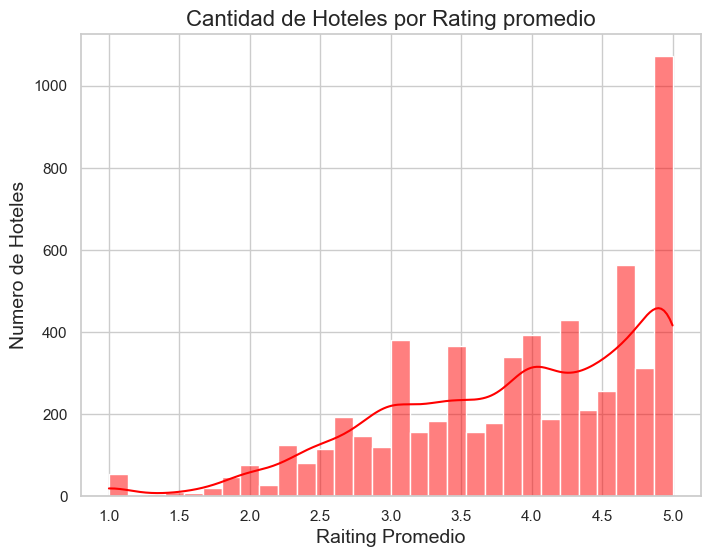

In [17]:
# Lo vemos graficamente:
plt.figure(figsize=(8, 6))
sns.histplot(x='avg_rating' ,data = metadatos_sitio__hotel, bins=30, kde=True, color='red')
plt.xlabel('Raiting Promedio', fontsize=14)
plt.ylabel('Numero de Hoteles', fontsize=14)
plt.title('Cantidad de Hoteles por Rating promedio', fontsize=16)
plt.show()

Podemos ver una gran cantidad de hoteles en estos Estados tienen un promedio de 5 estrellas valoradas por los usuarios

## Datasets Estados

Leemos los datasets que ya posteriormente unimos porque venian en diferentes json y les eliminamos las columnas 'pics'y 'resp' por ser inecesarias y contener una gran cantidad de valores nulos.

In [19]:
# California:
California = pd.read_parquet('../Dataset Final Google/Reviews Estados/California.parquet')

# Florida:
Florida = pd.read_parquet('../Dataset Final Google/Reviews Estados/Florida.parquet')

# Georgia:
Georgia = pd.read_parquet('../Dataset Final Google/Reviews Estados/Georgia.parquet')

# Kansas:
Kansas = pd.read_parquet('../Dataset Final Google/Reviews Estados/Kansas.parquet')

# Massachusetts:
Massachusetts = pd.read_parquet('../Dataset Final Google/Reviews Estados/Massachusetts.parquet')

# Missouri:
Missouri = pd.read_parquet('../Dataset Final Google/Reviews Estados/Missouri.parquet')

# New_Jersey:
New_Jersey = pd.read_parquet('../Dataset Final Google/Reviews Estados/New_Jersey.parquet')

# New_York
New_York = pd.read_parquet('../Dataset Final Google/Reviews Estados/New_York.parquet')

# Pensilvania
Pensilvania = pd.read_parquet('../Dataset Final Google/Reviews Estados/Pensilvania.parquet')

# Texas:
Texas = pd.read_parquet('../Dataset Final Google/Reviews Estados/Texas.parquet')

# Washington:
Washington = pd.read_parquet('../Dataset Final Google/Reviews Estados/Washington.parquet')

Ahora vemos informacion general de todos los estados:


In [20]:
print('California:')
print(California.info(), '\n')

print('Geogia:')
print(Georgia.info(), '\n')

print('Kansas:')
print(Kansas.info(), '\n')

print('Massachusetts:')
print(Massachusetts.info(), '\n')

print('New Jersey:')
print(New_Jersey.info(), '\n')

print('Missouri:')
print(Missouri.info(), '\n')

print('New York:')
print(New_York.info(), '\n')

print('Texas:')
print(Texas.info(), '\n')

print('Florida:')
print(Florida.info(), '\n')

print('Pensilvania:')
print(Pensilvania.info(),'\n')

print('Washington:')
print(Washington.info(), '\n')


California:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   gmap_id  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 123.6+ MB
None 

Geogia:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950000 entries, 0 to 1949999
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   gmap_id  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 89.3+ MB
None 

Kansas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950000 entries, 0 to 1949999
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text  

Notamos que todos los datasets tienen las mismas 7 columnas que son: 'User_id', 'name', 'time', 'rating', 'text' y 'game_id'.
Con respecto a los registros los datasets de los estados tienen:
* California: 2700000 
* Florida: 2850000 
* Washington: 1942020 
* Kansas: 1950000 
* Missouri: 1650000 
* Texas: 2296824 
* Pennsylvania: 2400000 
* New York: 2700000 
* New Jersey: 1950000 
* Massachusetts: 2400000 
* Georgia: 1950000 

Vemos la cantidad de reviews por estado graficamente con un grafico de barras:

In [21]:
# Sacamos la cantidad de filas por Estado y lo agregamos a variables:
California_cantidad = len(California)
Florida_cantidad = len(Florida)
Georgia_cantidad = len(Georgia)
Kansas_cantidad = len(Kansas)
Massachusetts_cantidad = len(Massachusetts)
Missouri_cantidad = len(Missouri)
New_Jersey_cantidad = len(New_Jersey)
New_York_cantidad = len(New_York)
Pensilvania_cantidad = len(Pensilvania)
Texas_cantidad = len(Texas)
Washington_cantidad = len(Washington)

In [22]:
revies_cantidad = [California_cantidad, Florida_cantidad, Georgia_cantidad, Kansas_cantidad, Massachusetts_cantidad, Missouri_cantidad, New_Jersey_cantidad, New_York_cantidad, Pensilvania_cantidad, Texas_cantidad, Washington_cantidad]
nombres = ['California', 'Florida','Georgia', 'Kansas', 'Massachusetts',  'Missouri', 'New_Jersey', 'New_York', 'Pensilvania', 'Texas', 'Washington']

C:\Users\patri\AppData\Local\Temp\ipykernel_10796\3600376057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= nombres, y= revies_cantidad , palette='viridis')


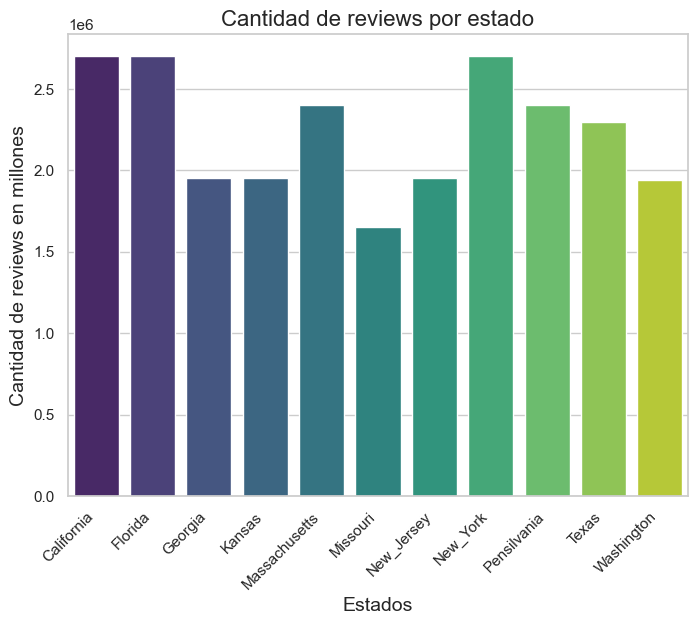

In [23]:
plt.figure(figsize=(8, 6))  
sns.barplot(x= nombres, y= revies_cantidad , palette='viridis')
plt.xlabel('Estados', fontsize=14)
plt.ylabel('Cantidad de reviews en millones', fontsize=14)
plt.title('Cantidad de reviews por estado', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

Podemos observar que las reviews de los estados van de entre 1.5 a 2.5 millones aproximadamente, los cuales nos va a permitir tener un buen recurso de datos para el proyecto.

Hacemos un viztazo mas cercano sobre una de las bases de datos para ver las columnas, en este caso usamos California ya que todos los Estados tienen la misma estructura:

In [24]:
California.head()

,user_id,name,time,rating,text,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49


Vemos los tipos de datos que comparten las columnas:

In [25]:
print(f"La columna 'user_id' es de tipo: {California['user_id'].dtype} es numerica-continua", '\n')

print(f"La columna 'name' es de tipo: {California['name'].dtype}, y es una variable de texto", '\n')

print(f"La columna 'rating' es de tipo: {California['rating'].dtype}, es una variable categorica-ordinal" , '\n')

print(f"La columna 'text' es de tipo: {California['text'].dtype}, es una variable de texto", '\n')

print(f"La columna 'gmap_id' es de tipo: {California['gmap_id'].dtype}, es una variable de texto", '\n')

La columna 'user_id' es de tipo: float64 es numerica-continua 

La columna 'name' es de tipo: object, y es una variable de texto 

La columna 'rating' es de tipo: int64, es una variable categorica-ordinal 

La columna 'text' es de tipo: object, es una variable de texto 

La columna 'gmap_id' es de tipo: object, es una variable de texto 



Vemos la cantidad de nulos por estado:

In [26]:
print('California nulos:')
print(California.isna().sum(), '\n')

print('Georgia nulos:')
print(Georgia.isna().sum(), '\n')

print('Kansas nulos:')
print(Kansas.isna().sum(), '\n')

print('Massachusetts nulos:')
print(Massachusetts.isna().sum(), '\n')

print('New Jersey nulos:')
print(New_Jersey.isna().sum(), '\n')

print('Missouri nulos:')
print(Missouri.isna().sum(), '\n')

print('New York nulos:')
print(New_York.isna().sum(), '\n')

print('Texas nulos:')
print(Texas.isna().sum(), '\n')

print('Florida nulos:')
print(Florida.isna().sum(), '\n')

print('Pensilvania nulos:')
print(Pensilvania.isna().sum(),'\n')

print('Washington nulos:')
print(Washington.info(), '\n')

California nulos:


user_id          0
name             0
time             0
rating           0
text       1170964
gmap_id          0
dtype: int64 

Georgia nulos:
user_id         0
name            0
time            0
rating          0
text       800503
gmap_id         0
dtype: int64 

Kansas nulos:
user_id         0
name            0
time            0
rating          0
text       900604
gmap_id         0
dtype: int64 

Massachusetts nulos:
user_id          0
name             0
time             0
rating           0
text       1128070
gmap_id          0
dtype: int64 

New Jersey nulos:
user_id         0
name            0
time            0
rating          0
text       864336
gmap_id         0
dtype: int64 

Missouri nulos:
user_id         0
name            0
time            0
rating          0
text       697268
gmap_id         0
dtype: int64 

New York nulos:
user_id          0
name             0
time             0
rating           0
text       1163593
gmap_id          0
dtype: int64 

Texas nulos:
user_id 

Podemos notar que en todos los Estados la columna 'text' tiene muchos nulos. Tambien vemos la cantidad de duplicados:

In [27]:
print(f'California duplicados: {California.duplicated().sum()}', '\n')

print(f'Georgia duplicados: {Georgia.duplicated().sum()}', '\n')

print(f'Kansas duplicados: {Kansas.duplicated().sum()}', '\n')

print(f'Massachusetts duplicados: {Massachusetts.duplicated().sum()}', '\n')

print(f'New Jersey duplicados: {New_Jersey.duplicated().sum()}', '\n')

print(f'Missouri duplicados: {Missouri.duplicated().sum()}', '\n')

print(f'New York duplicados: {New_York.duplicated().sum()}', '\n')

print(f'Texas duplicados: {Texas.duplicated().sum()}', '\n')

print(f'Florida duplicados: {Florida.duplicated().sum()}', '\n')

print(f'Pensilvania duplicados: {Pensilvania.duplicated().sum()}', '\n')

print(f'Washington duplicados: {Washington.duplicated().sum()}', '\n')

California duplicados: 75243 

Georgia duplicados: 54580 

Kansas duplicados: 22062 

Massachusetts duplicados: 19702 

New Jersey duplicados: 30095 

Missouri duplicados: 29950 

New York duplicados: 59337 

Texas duplicados: 61384 

Florida duplicados: 108640 

Pensilvania duplicados: 33568 

Washington duplicados: 35592 

